# Missing Values

##  Handling Missing values

1. Missing completely at Random, MCAR
2. Missing at random, MAR
3. Missing data not at random (MNAR)

### Examples

In [2]:
import seaborn as sns

In [6]:
df= sns.load_dataset('titanic')

In [8]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
## Check missing values
df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
# Count missing values for each column
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [13]:
# delete the rows or data points to handle the missing value
df.shape

(891, 15)

In [15]:
df.dropna().shape

(182, 15)

In [16]:
# Count missing values for each column
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [17]:
## column wise deletion
df.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


# Imputation missing techniques

## 1. mean value imputation

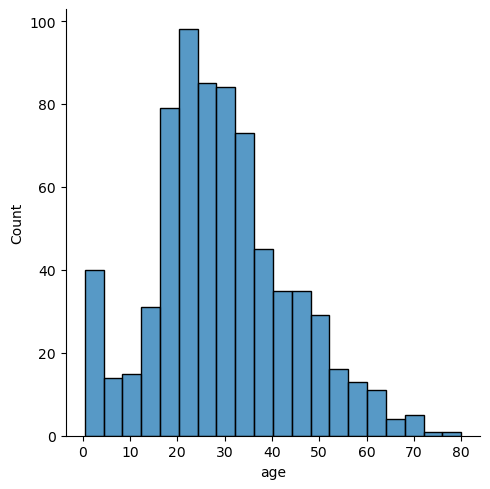

In [19]:
sns.displot(df['age'])

<Axes: xlabel='age', ylabel='Count'>

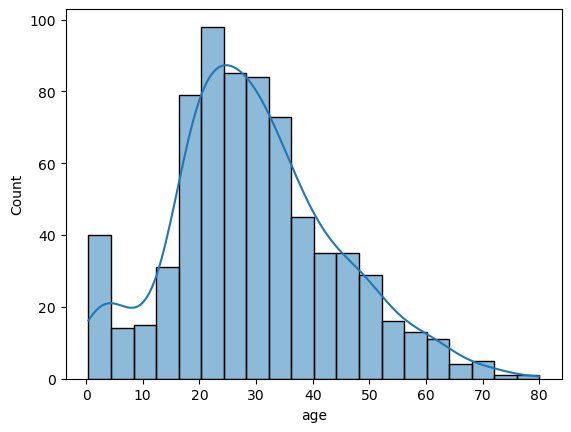

In [20]:
sns.histplot(df['age'],kde=True)

In [25]:
df['Age_mean']=df['age'].fillna(df['age'].mean())

In [26]:
df[['Age_mean','age']]

,Age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


In [27]:
## Mean imputation works well when we have normally distributed data

## 2. Median value imputation  - if we have outliers in the dataset

In [29]:
df['age_median']= df['age'].fillna(df['age'].median())

In [32]:
df[['Age_mean','age_median','age']]

,Age_mean,age_median,age
0,22.000000,22.0,22.0
1,38.000000,38.0,38.0
2,26.000000,26.0,26.0
3,35.000000,35.0,35.0
4,35.000000,35.0,35.0
...,...,...,...
886,27.000000,27.0,27.0
887,19.000000,19.0,19.0
888,29.699118,28.0,NaN
889,26.000000,26.0,26.0


### 3. Mode Imputation techniques --  Categorical Values 

In [33]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_median,Age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0,62.0


In [34]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [38]:
df[df['embarked'].notna()]['embarked'].mode()[0]

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 889, dtype: object

In [41]:
mode_value= df[df['embarked'].notna()]['embarked'].mode()[0]

In [42]:
df['embarked'].fillna(mode_value)

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object

In [44]:
df['embarked_mode']= df['embarked'].fillna(mode_value)

In [45]:
df[['embarked_mode','embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [46]:
df['embarked_mode'].isnull().sum()

0

In [47]:
df['embarked'].isnull().sum()

2

# Handling Imbalanced Dataset
1. Up Sampling
2. Down Sampling
3. SMOTE

# 1. Up sampling

In [52]:
import numpy as np 
import pandas as pd

# set the random seed for reproducibility
np.random.seed(123)

# Create a dataframe with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_o

In [53]:
n_class_0,n_class_1

(900, 100)

In [54]:
## Create my dataframe with Imbalanced Dataset

# Class 0 Data
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

# Class 1 Data
class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

In [57]:
df = pd.concat([class_0, class_1]).reset_index (drop = True)

In [61]:
df.tail()

,feature_1,feature_2,target
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1
999,2.697490,2.013570,1


In [62]:
df.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [65]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [66]:
## Upsampling
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [67]:
from sklearn.utils import resample
df_minority_upsample = resample(df_minority,replace = True, #Sample with replacement
         n_samples=len(df_majority),
         random_state=42
        )

In [68]:
df_minority_upsample.shape

(900, 3)

In [69]:
df_minority_upsample.head()

,feature_1,feature_2,target
951,1.125854,1.843917,1
992,2.196570,1.397425,1
914,1.932170,2.998053,1
971,2.272825,3.034197,1
960,2.870056,1.550485,1


In [73]:
df_upsampled = pd.concat([df_majority,df_minority_upsample])

In [79]:
df_upsampled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

# 2. Down sampling

In [78]:
import pandas as pd
import numpy as np

# Number of samples for each class (imbalanced)
n_class_0 = 900
n_class_1 = 100

# Class 0 Data
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

# Class 1 Data
class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

# Combine into a single DataFrame
df = pd.concat([class_0, class_1], ignore_index=True)

print(df['target'].value_counts())

target
0    900
1    100
Name: count, dtype: int64


In [80]:
## Downsampling
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [81]:
from sklearn.utils import resample
df_majority_downsampled = resample(df_majority,replace = False, #Sample with replacement
         n_samples=len(df_minority),
         random_state=42
        )

In [83]:
df_majority_downsampled.shape

(100, 3)

In [84]:
df_downsampled = pd.concat([df_minority,df_majority_downsampled])

In [85]:
df_downsampled['target'].value_counts()

target
1    100
0    100
Name: count, dtype: int64

# 3. SMOTE (Synthetic Minority Oversampling Technique)

- SMOTE (Synthetic Minority Over-sampling Technique) is a data preprocessing method used to address class imbalance in datasets by creating synthetic samples of the minority class.
- Instead of duplicating existing minority samples, SMOTE generates new ones by interpolating between existing minority class instances and their nearest neighbors in feature space, producing more varied and realistic examples to help machine learning models learn balanced decision boundaries.
- SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances

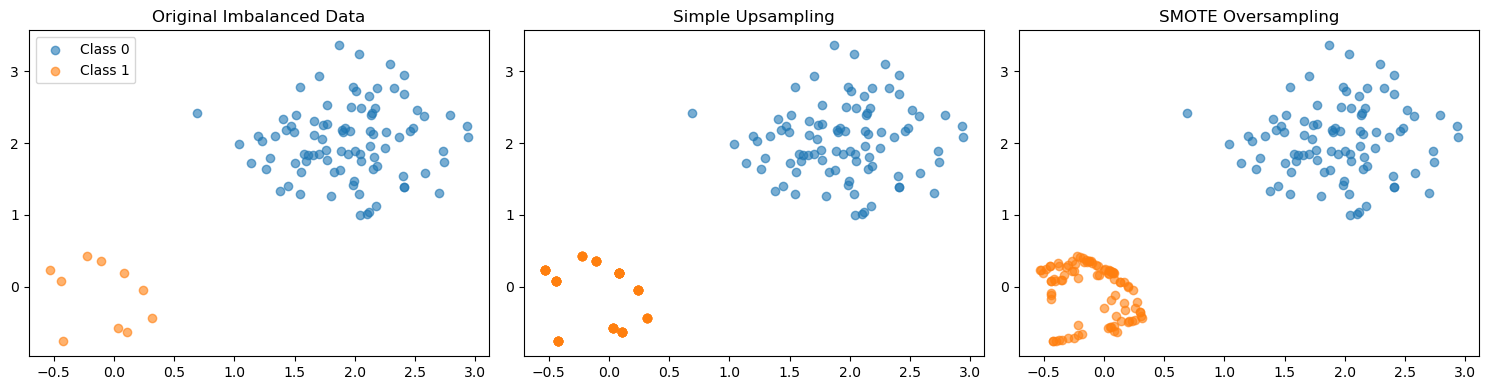

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

# Set seed for reproducibility
np.random.seed(42)

# Create imbalanced dataset
n_class_0 = 90
n_class_1 = 10

class_0 = np.random.normal(loc=[2, 2], scale=0.5, size=(n_class_0, 2))
class_1 = np.random.normal(loc=[0, 0], scale=0.5, size=(n_class_1, 2))

X = np.vstack((class_0, class_1))
y = np.array([0]*n_class_0 + [1]*n_class_1)

# Upsampling minority class by duplication
X_minority = X[y == 1]
y_minority = y[y == 1]
X_majority = X[y == 0]
y_majority = y[y == 0]

X_minority_upsampled, y_minority_upsampled = resample(
    X_minority,
    y_minority,
    replace=True,
    n_samples=n_class_0,
    random_state=42
)

X_upsampled = np.vstack((X_majority, X_minority_upsampled))
y_upsampled = np.hstack((y_majority, y_minority_upsampled))

# SMOTE oversampling
sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(X, y)

# Plot original, upsampled, and SMOTE datasets
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Original
axes[0].scatter(X[y == 0, 0], X[y == 0, 1], label='Class 0', alpha=0.6)
axes[0].scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1', alpha=0.6)
axes[0].set_title("Original Imbalanced Data")
axes[0].legend()

# Upsampled
axes[1].scatter(X_upsampled[y_upsampled == 0, 0], X_upsampled[y_upsampled == 0, 1], label='Class 0', alpha=0.6)
axes[1].scatter(X_upsampled[y_upsampled == 1, 0], X_upsampled[y_upsampled == 1, 1], label='Class 1', alpha=0.6)
axes[1].set_title("Simple Upsampling")

# SMOTE
axes[2].scatter(X_smote[y_smote == 0, 0], X_smote[y_smote == 0, 1], label='Class 0', alpha=0.6)
axes[2].scatter(X_smote[y_smote == 1, 0], X_smote[y_smote == 1, 1], label='Class 1', alpha=0.6)
axes[2].set_title("SMOTE Oversampling")

plt.tight_layout()
plt.show()


In [106]:
from sklearn.datasets import make_classification

In [107]:
X,y= make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,
                    weights=[0.90],random_state=12)

In [108]:
import pandas as pd
df1 = pd.DataFrame(X,columns=['f1','f2'])
df2 = pd.DataFrame(y,columns=['target'])
final_df =pd.concat([df1,df2],axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [128]:
final_df

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0
...,...,...,...
995,-0.712495,-0.880452,0
996,-2.625830,-2.827891,0
997,-1.326439,-1.815178,0
998,-0.833486,-0.514647,0


In [109]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

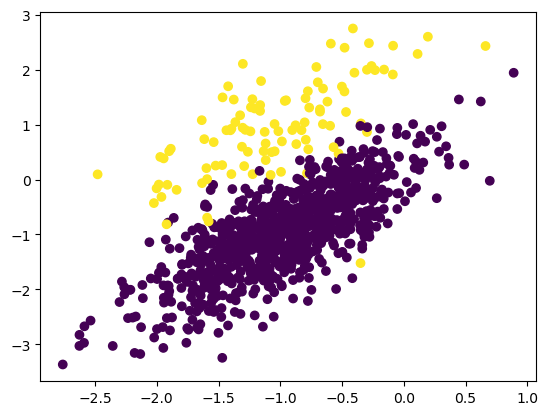

In [110]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [111]:
# !pip install imblearn

In [113]:
from imblearn.over_sampling import SMOTE
# from sklearn.utils import resample

In [114]:
## transform the dataset
oversample = SMOTE()
X,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [115]:
X.shape

(1800, 2)

In [116]:
y.shape

(1800,)

In [118]:
y==0

0        True
1        True
2        True
3       False
4        True
        ...  
1795    False
1796    False
1797    False
1798    False
1799    False
Name: target, Length: 1800, dtype: bool

In [119]:
y[y==0]

0      0
1      0
2      0
4      0
5      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: target, Length: 900, dtype: int64

In [120]:
len(y[y==0])

900

In [121]:
len(y[y==1])

900

In [125]:
df1 = pd.DataFrame(X,columns=['f1','f2'])
df2 = pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1)

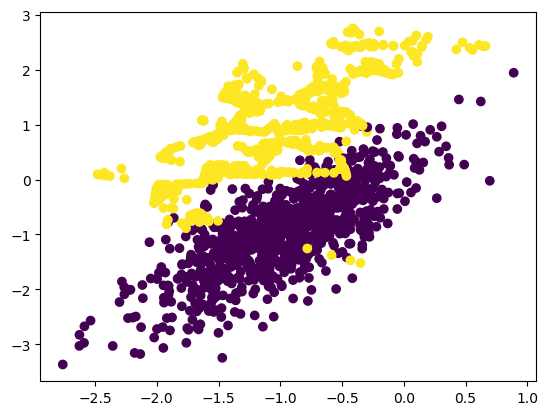

In [126]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])

In [130]:
oversample_df

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0
...,...,...,...
1795,-1.131540,0.546988,1
1796,-1.595625,0.120608,1
1797,0.059433,2.325547,1
1798,-0.471423,2.442294,1


# 5 number summary & Box Plot

### Minimum, maximun, median, q1, q3, IQR

In [131]:
import numpy as np

In [135]:
lst_marks=[45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74]
minimum,Q1, median, Q3, maximum = np.quantile(lst_marks,[0,0.25,0.50,0.75,1.0])

In [136]:
minimum,Q1, median, Q3, maximum

(32.0, 54.0, 67.0, 89.0, 99.0)

In [137]:
IQR = Q3-Q1
print(IQR)

35.0


In [141]:
lower_fence= Q1-1.5*(IQR)
Higher_fence=Q3+1.5*(IQR)


In [142]:
lower_fence

1.5

In [143]:
Higher_fence

141.5

In [144]:
lst_marks=[45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74]

<Axes: >

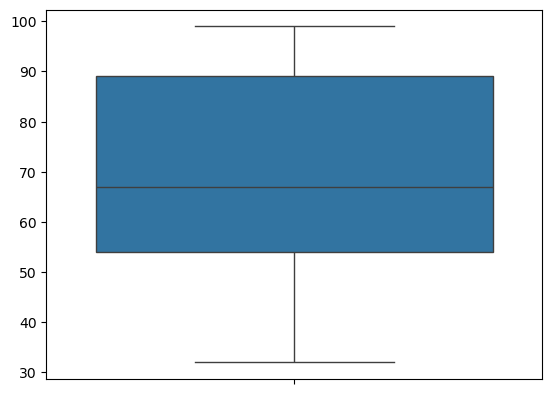

In [145]:
import seaborn as sns
sns.boxplot(lst_marks)

In [148]:
lst_marks=[-100,-200,45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74,150,170,180]

<Axes: >

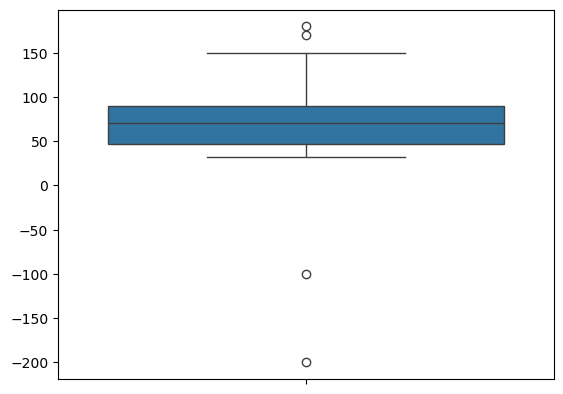

In [149]:
sns.boxplot(lst_marks)

# Data Encoding
1. Nominal/OHL Encoding
2. Label and ordinal encoding
3. Target Guided Ordinal Encoding

# 1. Nominal Encoding (also known as One-Hot Encoding / OHL Encoding)
Definition:
Nominal Encoding is a technique used to convert categorical variables (those with discrete, non-ordinal labels) into a numeric format that machine learning algorithms can understand.
Nominal means there is no inherent order among the categories (e.g., red, blue, green).
One-Hot Encoding (OHL) creates a binary column for each category, marking 1 if the observation belongs to that category and 0 otherwise.
Example:
Suppose we have a column "Color":
| Color |
| ----- |
| Red   |
| Blue  |
| Green |

After One-Hot Encoding:

| Red | Blue | Green |
| --- | ---- | ----- |
| 1   | 0    | 0     |
| 0   | 1    | 0     |
| 0   | 0    | 1     |

> When to Use:
- For categorical data with no ranking (Nominal categories).
- When models can’t handle non-numeric features directly (e.g., most regression models, neural networks).
> Pros:
- Preserves the fact that categories are non-ordinal.
- Prevents misleading numeric relationships between categories.
> Cons:
- Increases dimensionality if there are many categories.


In [150]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [156]:
## Create a simple dataframe
df = pd.DataFrame({
    'color':['red','blue','green','green','red','blue']
})

In [157]:
df.head()

,color
0,red
1,blue
2,green
3,green
4,red


In [158]:
## create an instance of onehotencoder
encoder= OneHotEncoder()

In [161]:
## Perform fit and transform
encoded = encoder.fit_transform(df[['color']]).toarray()

In [162]:
import pandas as pd
encoder_df= pd.DataFrame(encoded,columns=encoder.get_feature_names_out())

In [163]:
encoder_df

,color_blue,color_green,color_red
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
5,1.0,0.0,0.0


In [164]:
encoder.transform([['blue']])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


<1x3 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [165]:
## for new data
encoder.transform([['blue']]).toarray()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[1., 0., 0.]])

In [169]:
pd.concat([df,encoder_df],axis=1)

,color,color_blue,color_green,color_red
0,red,0.0,0.0,1.0
1,blue,1.0,0.0,0.0
2,green,0.0,1.0,0.0
3,green,0.0,1.0,0.0
4,red,0.0,0.0,1.0
5,blue,1.0,0.0,0.0


In [170]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

# Load the tips dataset
tips = sns.load_dataset('tips')

# Select categorical columns to encode
categorical_cols = ['sex', 'smoker', 'day', 'time']

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid dummy variable trap

# Fit and transform categorical columns
encoded_array = encoder.fit_transform(tips[categorical_cols])

# Get new column names from encoder
encoded_cols = encoder.get_feature_names_out(categorical_cols)

# Create DataFrame from encoded data
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols)

# Combine with original DataFrame (excluding original categorical cols)
final_tips = pd.concat([tips.drop(columns=categorical_cols), encoded_df], axis=1)

print(final_tips.head())


   total_bill   tip  size  sex_Male  smoker_Yes  day_Sat  day_Sun  day_Thur  \
0       16.99  1.01     2       0.0         0.0      0.0      1.0       0.0   
1       10.34  1.66     3       1.0         0.0      0.0      1.0       0.0   
2       21.01  3.50     3       1.0         0.0      0.0      1.0       0.0   
3       23.68  3.31     2       1.0         0.0      0.0      1.0       0.0   
4       24.59  3.61     4       0.0         0.0      0.0      1.0       0.0   

   time_Lunch  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [174]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

# Load the tips dataset
tips = sns.load_dataset('tips')

# Select categorical columns
categorical_cols = ['sex', 'smoker', 'day', 'time']

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')

# Fit and transform categorical columns
encoded_array = encoder.fit_transform(tips[categorical_cols])

# Get encoded column names
encoded_cols = encoder.get_feature_names_out(categorical_cols)

# Create a new DataFrame for encoded features
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols)

# Show the transformed DataFrame
print(encoded_df.head())


   sex_Male  smoker_Yes  day_Sat  day_Sun  day_Thur  time_Lunch
0       0.0         0.0      0.0      1.0       0.0         0.0
1       1.0         0.0      0.0      1.0       0.0         0.0
2       1.0         0.0      0.0      1.0       0.0         0.0
3       1.0         0.0      0.0      1.0       0.0         0.0
4       0.0         0.0      0.0      1.0       0.0         0.0


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# 2.1 Label Encoding
Definition:
Label Encoding is a technique used to convert categorical values into numeric codes by assigning each unique category an integer value.

Example:
['Red', 'Blue', 'Green'] → [2, 0, 1] (order doesn’t have inherent meaning)

Key points:
- Simple and memory-efficient.
- Used when categories have no natural order.
- Risk: Some algorithms may mistakenly treat the integer values as ordinal (having rank).

📌 Difference in short:
- Label Encoding: No order implied, just arbitrary numeric labels.
- Ordinal Encoding: Numeric labels represent a true order or hierarchy.

In [175]:
## Create a simple dataframe
df = pd.DataFrame({
    'color':['red','blue','green','green','red','blue']
})

In [177]:
df.head()

,color
0,red
1,blue
2,green
3,green
4,red


In [178]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder=LabelEncoder()

In [179]:
lbl_encoder.fit_transform(df[['color']])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 0, 1, 1, 2, 0])

In [180]:
lbl_encoder.transform([['red']])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([2])

In [182]:
lbl_encoder.transform([['blue']])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([0])

In [183]:
lbl_encoder.transform([['green']])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([1])


# 2.2 Ordinal Encoding
Definition:
Ordinal Encoding is a method of converting categorical variables into integers based on a defined order or hierarchy among the categories.

Example (education level):
['High School', 'Bachelor', 'Master', 'PhD'] → [0, 1, 2, 3]

Key points:
- Preserves meaningful order of categories.
- Used when the categories have a natural ranking.
- The integer values reflect relative magnitude but not the actual size of differences.


In [185]:
## Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder

In [188]:
# Create a Sample Dataframe with an Ordinal Variable
df = pd.DataFrame({
    'size':['small','medium','large','medium','small','large']
})

In [189]:
df

,size
0,small
1,medium
2,large
3,medium
4,small
5,large


In [190]:
## create an instance of ordinalEncoder and then fit_transform
encoder=OrdinalEncoder(categories = [['small','medium','large']])

In [191]:
encoder.fit_transform(df[['size']])

array([[0.],
       [1.],
       [2.],
       [1.],
       [0.],
       [2.]])

In [192]:
encoder.transform([['small']])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array([[0.]])

# 3. Target Guided Ordinal Encoding
#### Definition:
Target Guided Ordinal Encoding is a technique for encoding categorical variables into integers based on the relationship between each category and the target variable.
Instead of assigning arbitrary integers, categories are ordered according to a statistical measure of the target, such as:
- Mean of the target (for regression problems)
- Probability of target=1 (for classification problems)
Then, integers are assigned according to this order.
> Example (binary classification):
Suppose we have a categorical column City and target column Purchase (1 = Yes, 0 = No):
> 
| City    | Purchase Mean |
| ------- | ------------- |
| Delhi   | 0.80          |
| Mumbai  | 0.65          |
| Chennai | 0.30          |

We rank cities by their Purchase Mean:
- Delhi → rank 3
- Mumbai → rank 2
- Chennai → rank 1
Final encoded column:
> City: Delhi → 3, Mumbai → 2, Chennai → 1
### Key Points:
- Supervised encoding → uses target variable information during transformation.
- Useful for high-cardinality categorical features.
- Can help models capture the strength of association between category and target.
- Risk: May cause target leakage if encoding is done before train-test split.

/var/folders/jq/944hrjvd749gpmgdz145sztw0000gn/T/ipykernel_1532/514880475.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  class_order = df.groupby('class')['survived'].mean().sort_values().index
/var/folders/jq/944hrjvd749gpmgdz145sztw0000gn/T/ipykernel_1532/514880475.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='class', y='survived', data=df, order=class_order, palette='viridis')


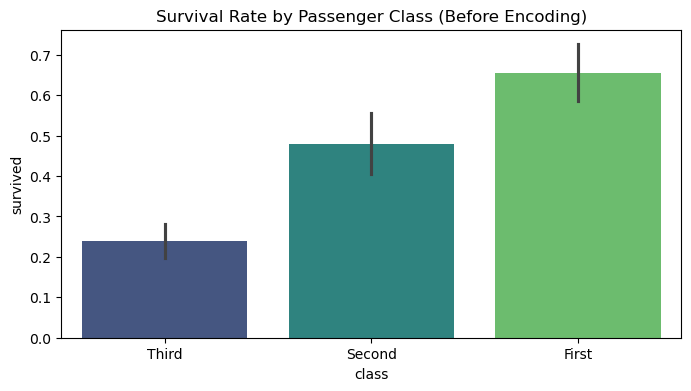

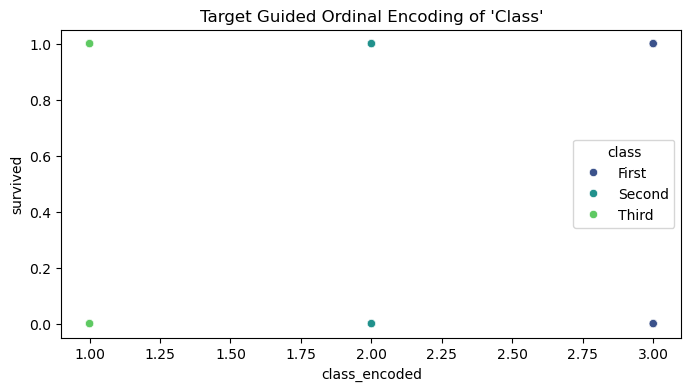

,class,sex,age,fare,survived,class_encoded
0,Third,male,22.0,7.2500,0,1
1,First,female,38.0,71.2833,1,3
2,Third,female,26.0,7.9250,1,1
3,First,female,35.0,53.1000,1,3
4,Third,male,35.0,8.0500,0,1


In [193]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset from seaborn (suitable for Target Guided Ordinal Encoding)
titanic = sns.load_dataset('titanic')

# Keep relevant columns for simplicity
df = titanic[['class', 'sex', 'age', 'fare', 'survived']].dropna()

# Target Guided Ordinal Encoding for 'class' based on mean survival rate
class_order = df.groupby('class')['survived'].mean().sort_values().index
class_mapping = {k: i for i, k in enumerate(class_order, 1)}
df['class_encoded'] = df['class'].map(class_mapping)

# Visualization: Survival rate by passenger class
plt.figure(figsize=(8, 4))
sns.barplot(x='class', y='survived', data=df, order=class_order, palette='viridis')
plt.title("Survival Rate by Passenger Class (Before Encoding)")
plt.show()

# Visualization: Encoded 'class' vs survival
plt.figure(figsize=(8, 4))
sns.scatterplot(x='class_encoded', y='survived', data=df, hue='class', palette='viridis')
plt.title("Target Guided Ordinal Encoding of 'Class'")
plt.show()

df.head()


In [194]:
# dreat a sample dataframe with a categorical variable and a target variable
df = pd.DataFrame({
    'city': ['New York', 'London', 'Paris', 'Tokyo', 'New York', 'Paris'],
    'price': [200,150,300,250,180,320]
})

In [195]:
df

,city,price
0,New York,200
1,London,150
2,Paris,300
3,Tokyo,250
4,New York,180
5,Paris,320


In [196]:
df.groupby('city')['price'].mean()

city
London      150.0
New York    190.0
Paris       310.0
Tokyo       250.0
Name: price, dtype: float64

In [198]:
mean_price = df.groupby('city')['price'].mean().to_dict()

In [199]:
mean_price

{'London': 150.0, 'New York': 190.0, 'Paris': 310.0, 'Tokyo': 250.0}

In [202]:
df['city_encoded'] = df['city'].map(mean_price)

In [203]:
df

,city,price,city_encoded
0,New York,200,190.0
1,London,150,150.0
2,Paris,300,310.0
3,Tokyo,250,250.0
4,New York,180,190.0
5,Paris,320,310.0


In [204]:
df[['price','city_encoded']]

,price,city_encoded
0,200,190.0
1,150,150.0
2,300,310.0
3,250,250.0
4,180,190.0
5,320,310.0
